# 802. Find Eventual Safe States
In a directed graph, we start at some node and every turn, walk along a directed edge of the graph.  If we reach a node that is terminal (that is, it has no outgoing directed edges), we stop.

Now, say our starting node is eventually safe if and only if we must eventually walk to a terminal node.  More specifically, there exists a natural number K so that for any choice of where to walk, we must have stopped at a terminal node in less than K steps.

Which nodes are eventually safe?  Return them as an array in sorted order.

The directed graph has N nodes with labels 0, 1, ..., N-1, where N is the length of graph.  The graph is given in the following form: graph[i] is a list of labels j such that (i, j) is a directed edge of the graph.

Example:
Input: graph = [[1,2],[2,3],[5],[0],[5],[],[]]

Output: [2,4,5,6]
Here is a diagram of the above graph.
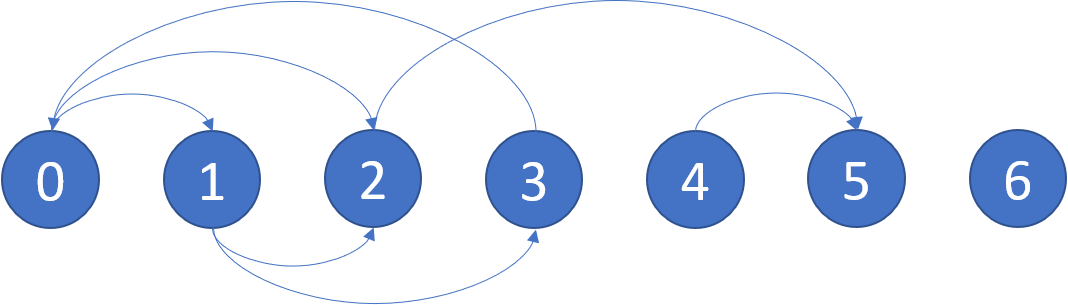

Note:

* graph will have length at most 10000.
* The number of edges in the graph will not exceed 32000.
* Each graph[i] will be a sorted list of different integers, chosen within the range [0, graph.length - 1].

## Approach 2: Depth-First Search
Intuition

As in Approach #1, the crux of the problem is whether you reach a cycle or not.

Let us perform a "brute force": a cycle-finding DFS algorithm on each node individually. This is a classic "white-gray-black" DFS algorithm that would be part of any textbook on DFS. We mark a node gray on entry, and black on exit. If we see a gray node during our DFS, it must be part of a cycle. In a naive view, we'll clear the colors between each search.

Algorithm

We can improve this approach, by noticing that we don't need to clear the colors between each search.

When we visit a node, the only possibilities are that we've marked the entire subtree black (which must be eventually safe), or it has a cycle and we have only marked the members of that cycle gray. So indeed, the invariant that gray nodes are always part of a cycle, and black nodes are always eventually safe is maintained.

In order to exit our search quickly when we find a cycle (and not paint other nodes erroneously), we'll say the result of visiting a node is true if it is eventually safe, otherwise false. This allows information that we've reached a cycle to propagate up the call stack so that we can terminate our search early.

Complexity Analysis

* Time Complexity: O(N+E), where NN is the number of nodes in the given graph, and E is the total number of edges.

* Space Complexity: O(N) in additional space complexity.

In [1]:
def eventualSafeNodes(graph):
    visited = [-1]*len(graph) # 0: visited but unknow status; 1: unsafe; 2: safe
    res = []

    def dfs(node):
        """
        False  :   safe (i.e. non-cyclical)
        True   :   non-safe (i.e. cyclical)
        """      
        if visited[node] in (0,1):
            return True
        if visited[node] == 2:
            return False
        visited[node] = 0
        for nei in graph[node]:
            if dfs(nei):
                visited[node] = 1
                return True
        visited[node] = 2
        res.append(node)
        return False

    for i in range(len(graph)):
        dfs(i)
    return sorted(res)

eventualSafeNodes([[1,2],[2,3],[5],[0],[5],[],[]])

[2, 4, 5, 6]